<a href="https://colab.research.google.com/github/ArunKrishnan09/Covid-Analysis/blob/main/Covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from io import StringIO
import numpy as np
import sqlite3

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import os
os.chdir("/content/drive/MyDrive/Arun-ads1/Covid project")

In [82]:
misc_data = pd.read_csv("OWID_COVID_Data.csv")


In [83]:
misc_data = misc_data[["iso_code", "location", "date", "population",
    'population_density', 'median_age', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'life_expectancy', 'human_development_index']]

In [84]:
urls = ["https://catalog.ourworldindata.org/garden/covid/latest/cases_deaths/cases_deaths.csv", "https://catalog.ourworldindata.org/garden/covid/latest/hospital/hospital.csv", "https://catalog.ourworldindata.org/garden/covid/latest/vaccinations_global/vaccinations_global.csv", "https://catalog.ourworldindata.org/garden/covid/latest/vaccinations_age/vaccinations_age.csv", "https://catalog.ourworldindata.org/garden/covid/latest/testing/testing.csv", "https://catalog.ourworldindata.org/garden/covid/latest/google_mobility/google_mobility.csv", "https://catalog.ourworldindata.org/garden/covid/latest/oxcgrt_policy/oxcgrt_policy.csv"]

In [85]:
'''
CODE FOR DOWNLOADING DATASETS
import requests

urls = ["https://catalog.ourworldindata.org/garden/covid/latest/cases_deaths/cases_deaths.csv", "https://catalog.ourworldindata.org/garden/covid/latest/hospital/hospital.csv", "https://catalog.ourworldindata.org/garden/covid/latest/vaccinations_global/vaccinations_global.csv", "https://catalog.ourworldindata.org/garden/covid/latest/vaccinations_age/vaccinations_age.csv", "https://catalog.ourworldindata.org/garden/covid/latest/testing/testing.csv", "https://catalog.ourworldindata.org/garden/covid/latest/google_mobility/google_mobility.csv", "https://catalog.ourworldindata.org/garden/covid/latest/oxcgrt_policy/oxcgrt_policy.csv"]
dataset_names = ["cases_deaths", "hospital", "vaccinations_global", "vaccinations_age", "testing", "google_mobility", "oxcgrt_policy"]

for i, url in enumerate(urls):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes

        df = pd.read_csv(StringIO(response.text))
        df.to_csv(f"{dataset_names[i]}.csv", index=False)
        print(f"Downloaded and saved {dataset_names[i]}.csv")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {url}: {e}")
    except Exception as e:
        print(f"Error processing {url}: {e}")
'''

'\nCODE FOR DOWNLOADING DATASETS\nimport requests\n\nurls = ["https://catalog.ourworldindata.org/garden/covid/latest/cases_deaths/cases_deaths.csv", "https://catalog.ourworldindata.org/garden/covid/latest/hospital/hospital.csv", "https://catalog.ourworldindata.org/garden/covid/latest/vaccinations_global/vaccinations_global.csv", "https://catalog.ourworldindata.org/garden/covid/latest/vaccinations_age/vaccinations_age.csv", "https://catalog.ourworldindata.org/garden/covid/latest/testing/testing.csv", "https://catalog.ourworldindata.org/garden/covid/latest/google_mobility/google_mobility.csv", "https://catalog.ourworldindata.org/garden/covid/latest/oxcgrt_policy/oxcgrt_policy.csv"]\ndataset_names = ["cases_deaths", "hospital", "vaccinations_global", "vaccinations_age", "testing", "google_mobility", "oxcgrt_policy"]\n\nfor i, url in enumerate(urls):\n    try:\n        response = requests.get(url)\n        response.raise_for_status()  # Raise an exception for bad status codes\n\n        df

In [86]:
cases_deaths = pd.read_csv("cases_deaths.csv")
hospital = pd.read_csv("hospital.csv")
vaccinations_global = pd.read_csv("vaccinations_global.csv")
testing = pd.read_csv("testing.csv")
oxcgrt_policy = pd.read_csv("oxcgrt_policy.csv")

In [87]:
datasets = [cases_deaths, hospital, vaccinations_global, testing, oxcgrt_policy, misc_data]

In [88]:
#I couldn't get a for loop to work so I simply did this
cases_deaths["date"] = pd.to_datetime(cases_deaths["date"])
hospital["date"] = pd.to_datetime(hospital["date"])
vaccinations_global["date"] = pd.to_datetime(vaccinations_global["date"])
testing["date"] = pd.to_datetime(testing["date"])
oxcgrt_policy["date"] = pd.to_datetime(oxcgrt_policy["date"])
misc_data["date"] = pd.to_datetime(misc_data["date"])

In [89]:
for dataset in datasets:
  print(dataset.isnull().sum())

country                                         0
date                                            0
new_cases                                    2284
total_cases                                     0
new_deaths                                   1655
total_deaths                                    0
weekly_cases                                 3563
weekly_deaths                                2905
weekly_pct_growth_cases                    144072
weekly_pct_growth_deaths                   249307
biweekly_cases                               5367
biweekly_deaths                              4657
biweekly_pct_growth_cases                  131348
biweekly_pct_growth_deaths                 230392
new_cases_per_million                        2284
new_deaths_per_million                       1655
total_cases_per_million                         0
total_deaths_per_million                        0
weekly_cases_per_million                     3563
weekly_deaths_per_million                    2905


CLEANING CASE DATA

In [90]:
cases_deaths.drop(["total_deaths_per_million_last12m", "total_deaths_per_100k_last12m", "total_deaths_last12m", "biweekly_pct_growth_deaths", "biweekly_pct_growth_cases", "weekly_pct_growth_cases", "weekly_pct_growth_deaths", "cfr_short_term"], axis =1) #Dropping columns with tons of null (over 150k or so)

,country,date,new_cases,total_cases,new_deaths,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,...,new_cases_per_million_7_day_avg_right,new_deaths_per_million_7_day_avg_right,new_deaths_per_100k_7_day_avg_right,cfr,cfr_100_cases,days_since_100_total_cases,days_since_5_total_deaths,days_since_1_total_cases_per_million,days_since_0_1_total_deaths_per_million,days_since_100_total_cases_and_5m_pop
0,Afghanistan,2020-01-04,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-86.0,-91.0,-81.0,-91.0,-86.0
1,Afghanistan,2020-01-05,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-85.0,-90.0,-80.0,-90.0,-85.0
2,Afghanistan,2020-01-06,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-84.0,-89.0,-79.0,-89.0,-84.0
3,Afghanistan,2020-01-07,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-83.0,-88.0,-78.0,-88.0,-83.0
4,Afghanistan,2020-01-08,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-82.0,-87.0,-77.0,-87.0,-82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455495,Zimbabwe,2024-12-25,0.0,266399,0.0,5740,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.154663,2.154663,1674.0,1756.0,1716.0,1756.0,1674.0
455496,Zimbabwe,2024-12-26,0.0,266399,0.0,5740,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.154663,2.154663,1675.0,1757.0,1717.0,1757.0,1675.0
455497,Zimbabwe,2024-12-27,0.0,266399,0.0,5740,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.154663,2.154663,1676.0,1758.0,1718.0,1758.0,1676.0
455498,Zimbabwe,2024-12-28,0.0,266399,0.0,5740,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.154663,2.154663,1677.0,1759.0,1719.0,1759.0,1677.0


In [91]:
cases_deaths = cases_deaths.fillna({"new_cases" : 0, "new_deaths" :0, "weekly_cases" :0, "weekly_deaths" :0})
#the nulls are normally around the start of covid, where there would be very few new cases. Which led me to believe that its zero at these spots

In [92]:
values = {}
for col in cases_deaths.columns:
  if col != "country" and col != "date":
    values[col] = cases_deaths[col].median()
cases_deaths=cases_deaths.fillna(value=values)

CLEANING HOSPITAL

In [93]:
hospital[hospital["daily_occupancy_icu"].isnull()]

,country,country_code,date,daily_occupancy_icu,daily_occupancy_icu_per_1m,daily_occupancy_hosp,daily_occupancy_hosp_per_1m,weekly_admissions_icu,weekly_admissions_icu_per_1m,weekly_admissions_hosp,weekly_admissions_hosp_per_1m
5877,Bulgaria,BGR,2023-01-01,NaN,NaN,351.0,51.755,NaN,NaN,NaN,NaN
8629,Croatia,HRV,2020-04-15,NaN,NaN,341.0,84.608,NaN,NaN,NaN,NaN
8630,Croatia,HRV,2020-04-16,NaN,NaN,372.0,92.299,NaN,NaN,NaN,NaN
8631,Croatia,HRV,2020-04-17,NaN,NaN,372.0,92.299,NaN,NaN,NaN,NaN
8632,Croatia,HRV,2020-04-18,NaN,NaN,361.0,89.570,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
44193,United Kingdom,GBR,2023-07-08,NaN,NaN,1154.0,17.094,NaN,NaN,NaN,NaN
44194,United Kingdom,GBR,2023-07-09,NaN,NaN,1154.0,17.094,NaN,NaN,NaN,NaN
44195,United Kingdom,GBR,2023-07-10,NaN,NaN,1148.0,17.005,NaN,NaN,NaN,NaN
44196,United Kingdom,GBR,2023-07-11,NaN,NaN,1146.0,16.976,NaN,NaN,NaN,NaN


In [94]:
values = {}
for col in hospital.columns:
  if col != "country" and col != "date" and col != "country_code":
    values[col] = hospital[col].median()
hospital = hospital.fillna(value=values)

CLEANING VACCINE_GLOBAL

In [95]:
vaccinations_global

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations,daily_vaccinations_smoothed,daily_people_vaccinated_smoothed,total_vaccinations_per_hundred,...,people_fully_vaccinated_interpolated,total_boosters_interpolated,total_vaccinations_no_boosters_interpolated,total_vaccinations_no_boosters_per_hundred_interpolated,rolling_vaccinations_6m,rolling_vaccinations_6m_per_hundred,rolling_vaccinations_9m,rolling_vaccinations_9m_per_hundred,rolling_vaccinations_12m,rolling_vaccinations_12m_per_hundred
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,...,5.562400e+04,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1366.666667,1366.666667,NaN,...,5.562400e+04,0.000000e+00,1.366667e+03,NaN,1366.666667,0.003368,1.366667e+03,0.003368,1.366667e+03,0.003368
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1366.666667,1366.666667,NaN,...,5.562400e+04,0.000000e+00,2.733333e+03,NaN,2733.333333,0.006736,2.733333e+03,0.006736,2.733333e+03,0.006736
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1366.666667,1366.666667,NaN,...,5.562400e+04,0.000000e+00,4.100000e+03,NaN,4100.000000,0.010104,4.100000e+03,0.010104,4.100000e+03,0.010104
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1366.666667,1366.666667,NaN,...,5.562400e+04,0.000000e+00,5.466667e+03,NaN,5466.666667,0.013472,5.466667e+03,0.013472,5.466667e+03,0.013472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203052,Zimbabwe,2023-12-27,NaN,NaN,NaN,NaN,NaN,3822.227679,2428.736607,NaN,...,5.653986e+06,2.288662e+06,1.163116e+07,NaN,699467.665179,4.352884,1.047290e+06,6.517434,1.395113e+06,8.681983
203053,Zimbabwe,2023-12-28,NaN,NaN,NaN,NaN,NaN,3822.227679,2428.736607,NaN,...,5.656020e+06,2.291488e+06,1.163216e+07,NaN,699467.665179,4.352884,1.047290e+06,6.517434,1.395113e+06,8.681983
203054,Zimbabwe,2023-12-29,NaN,NaN,NaN,NaN,NaN,3822.227679,2428.736607,NaN,...,5.658053e+06,2.294315e+06,1.163315e+07,NaN,699467.665179,4.352884,1.047290e+06,6.517434,1.395113e+06,8.681983
203055,Zimbabwe,2023-12-30,NaN,NaN,NaN,NaN,NaN,3822.227679,2428.736607,NaN,...,5.660086e+06,2.297141e+06,1.163415e+07,NaN,699467.665179,4.352884,1.047290e+06,6.517434,1.395113e+06,8.681983


In [96]:
vaccinations_global.isnull().sum()

,0
country,0
date,0
total_vaccinations,119835
people_vaccinated,124046
people_fully_vaccinated,126046
total_boosters,144273
daily_vaccinations,134181
daily_vaccinations_smoothed,217
daily_people_vaccinated_smoothed,217
total_vaccinations_per_hundred,119835


In [97]:
#There are so many nulls in the data (over 100k per column out of 200k rows), so I decided the best course of action
#is to remove those columns
vaccine_null = vaccinations_global.isnull().sum()
for col in vaccinations_global.columns:
  if vaccine_null[col] > 50000:
    vaccinations_global = vaccinations_global.drop(col, axis=1)
vaccinations_global = vaccinations_global.fillna(0)

In [98]:
vaccinations_global.columns

Index(['country', 'date', 'daily_vaccinations_smoothed',
       'daily_people_vaccinated_smoothed',
       'daily_people_vaccinated_smoothed_per_hundred',
       'daily_vaccinations_smoothed_per_million',
       'total_vaccinations_interpolated', 'people_vaccinated_interpolated',
       'people_fully_vaccinated_interpolated', 'total_boosters_interpolated',
       'total_vaccinations_no_boosters_interpolated',
       'rolling_vaccinations_6m', 'rolling_vaccinations_6m_per_hundred',
       'rolling_vaccinations_9m', 'rolling_vaccinations_9m_per_hundred',
       'rolling_vaccinations_12m', 'rolling_vaccinations_12m_per_hundred'],
      dtype='object')

Cleaning testing


In [99]:
testing

,country,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_7day_smoothed,new_tests_per_thousand_7day_smoothed
0,Afghanistan,2022-01-29,853003.0,NaN,21.272,NaN,NaN,NaN
1,Afghanistan,2022-01-30,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2022-01-31,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2022-02-01,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2022-02-02,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
106783,Zimbabwe,2022-06-18,NaN,NaN,NaN,NaN,1782.0,0.111
106784,Zimbabwe,2022-06-19,NaN,NaN,NaN,NaN,1790.0,0.112
106785,Zimbabwe,2022-06-20,2374300.0,NaN,148.454,NaN,1880.0,0.118
106786,Zimbabwe,2022-06-21,NaN,NaN,NaN,NaN,2063.0,0.129


In [100]:
#For the columns total_tests and total_tests_per_thousand, I decided the best way to deal with the nulls
#was to replace the null by the previous value, assuming no new tests were taken, rather than cutting the data or setting it to 0
for country in testing["country"].unique():
  for row in testing[testing["country"] == country]["total_tests_per_thousand"].index:
    if np.isnan(testing.iloc[row, 4]):
      testing.iloc[row, 4] = testing.iloc[row-1, 4]

for country in testing["country"].unique():
  for row in testing[testing["country"] == country]["total_tests"].index:
    if np.isnan(testing.iloc[row, 2]):
      testing.iloc[row, 2] = testing.iloc[row-1, 2]

In [101]:
testing = testing.fillna(0)

In [102]:
testing.isnull().sum()

,0
country,0
date,0
total_tests,0
new_tests,0
total_tests_per_thousand,0
new_tests_per_thousand,0
new_tests_7day_smoothed,0
new_tests_per_thousand_7day_smoothed,0


Cleaning oxcgrt_policy (goverment response)

In [103]:
oxcgrt_policy

,country,date,c1m_school_closing,c2m_workplace_closing,c3m_cancel_public_events,c4m_restrictions_on_gatherings,c5m_close_public_transport,c6m_stay_at_home_requirements,c7m_restrictions_on_internal_movement,c8ev_international_travel_controls,...,v2a_vaccine_availability__summary,v2b_vaccine_age_eligibility_availability_age_floor__general_population_summary,v2c_vaccine_age_eligibility_availability_age_floor__at_risk_summary,stringency_index,containment_health_index,v2_vaccine_availability__summary,v2_pregnant_people,stringency_index_nonvax,stringency_index_vax,stringency_index_weighted_average
0,Afghanistan,2020-01-01,0,0,0,0,0,0,0,0,...,0,NaN,NaN,0.00,0.00,0,NaN,0.00,0.00,0.00
1,Afghanistan,2020-01-02,0,0,0,0,0,0,0,0,...,0,NaN,NaN,0.00,0.00,0,NaN,0.00,0.00,0.00
2,Afghanistan,2020-01-03,0,0,0,0,0,0,0,0,...,0,NaN,NaN,0.00,0.00,0,NaN,0.00,0.00,0.00
3,Afghanistan,2020-01-04,0,0,0,0,0,0,0,0,...,0,NaN,NaN,0.00,0.00,0,NaN,0.00,0.00,0.00
4,Afghanistan,2020-01-05,0,0,0,0,0,0,0,0,...,0,NaN,NaN,0.00,0.00,0,NaN,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202755,Zimbabwe,2022-12-27,1,2,1,0,0,0,0,1,...,3,5-15 yrs,5-15 yrs,29.48,41.65,3,0.0,30.56,26.85,29.48
202756,Zimbabwe,2022-12-28,1,2,1,0,0,0,0,1,...,3,5-15 yrs,5-15 yrs,29.48,41.65,3,0.0,30.56,26.85,29.48
202757,Zimbabwe,2022-12-29,1,2,1,0,0,0,0,1,...,3,5-15 yrs,5-15 yrs,29.48,41.65,3,0.0,30.56,26.85,29.48
202758,Zimbabwe,2022-12-30,1,2,1,0,0,0,0,1,...,3,5-15 yrs,5-15 yrs,29.48,41.65,3,0.0,30.56,26.85,29.48


In [104]:
oxcgrt_policy.isnull().sum()

,0
country,0
date,0
c1m_school_closing,0
c2m_workplace_closing,0
c3m_cancel_public_events,0
c4m_restrictions_on_gatherings,0
c5m_close_public_transport,0
c6m_stay_at_home_requirements,0
c7m_restrictions_on_internal_movement,0
c8ev_international_travel_controls,0


In [105]:
#Dropping unessecary columns
oxcgrt_policy = oxcgrt_policy.drop(["v2b_vaccine_age_eligibility_availability_age_floor__general_population_summary", "v2c_vaccine_age_eligibility_availability_age_floor__at_risk_summary", "v2_pregnant_people"], axis = 1)

In [106]:
#For these columns the best way to handle the nulls are to replace the values of nan with the value before, because the nan meant that
#there wasnt a new value recorded that day
cols = {"e3_fiscal_measures":12, "e4_international_support":13, "h4_emergency_investment_in_healthcare":17, "h5_investment_in_vaccines":18, "stringency_index_weighted_average":27}
for country in oxcgrt_policy["country"].unique():
  for col in cols:
    for row in oxcgrt_policy[oxcgrt_policy["country"] == country][col].index:
      if np.isnan(oxcgrt_policy.iloc[row, cols[col]]):
        try:
          oxcgrt_policy.iloc[row, cols[col]] = oxcgrt_policy.iloc[row-1, cols[col]]
        except:
          oxcgrt_policy.iloc[row, cols[col]] = 0

Cleaning misc data

In [107]:
misc_data

,iso_code,location,date,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
0,AFG,Afghanistan,2020-01-05,41128772,54.422,18.6,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511
1,AFG,Afghanistan,2020-01-06,41128772,54.422,18.6,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511
2,AFG,Afghanistan,2020-01-07,41128772,54.422,18.6,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511
3,AFG,Afghanistan,2020-01-08,41128772,54.422,18.6,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511
4,AFG,Afghanistan,2020-01-09,41128772,54.422,18.6,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Zimbabwe,2024-07-31,16320539,42.729,19.6,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,61.49,0.571
429431,ZWE,Zimbabwe,2024-08-01,16320539,42.729,19.6,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,61.49,0.571
429432,ZWE,Zimbabwe,2024-08-02,16320539,42.729,19.6,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,61.49,0.571
429433,ZWE,Zimbabwe,2024-08-03,16320539,42.729,19.6,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,61.49,0.571


In [108]:
misc_data.isnull().sum()

,0
iso_code,0
location,0
date,0
population,0
population_density,68943
median_age,94772
gdp_per_capita,101143
extreme_poverty,217439
cardiovasc_death_rate,100570
diabetes_prevalence,83524


In [109]:
"""
#For these columns the best way to handle the nulls are to replace the values of nan with the value before, because the nan meant that
#there wasnt a new value recorded that day
cols = {"population_density":4, "median_age":5, "gdp_per_capita":6, "extreme_poverty":7, "cardiovasc_death_rate":8, "diabetes_prevalence":9, "female_smokers":10, "male_smokers":11, "handwashing_facilities":12, "life_expectancy": 13, "human_development_index":14}
for country in misc_data["location"].unique():
  for col in cols:
    for row in misc_data[misc_data["location"] == country][col].index:
      if np.isnan(misc_data.iloc[row, cols[col]]):
        try:
          misc_data.iloc[row, cols[col]] = misc_data.iloc[row-1, cols[col]]
        except:
          misc_data.iloc[row, cols[col]] = 0
"""

'\n#For these columns the best way to handle the nulls are to replace the values of nan with the value before, because the nan meant that\n#there wasnt a new value recorded that day\ncols = {"population_density":4, "median_age":5, "gdp_per_capita":6, "extreme_poverty":7, "cardiovasc_death_rate":8, "diabetes_prevalence":9, "female_smokers":10, "male_smokers":11, "handwashing_facilities":12, "life_expectancy": 13, "human_development_index":14}\nfor country in misc_data["location"].unique():\n  for col in cols:\n    for row in misc_data[misc_data["location"] == country][col].index:\n      if np.isnan(misc_data.iloc[row, cols[col]]):\n        try:\n          misc_data.iloc[row, cols[col]] = misc_data.iloc[row-1, cols[col]]\n        except:\n          misc_data.iloc[row, cols[col]] = 0\n'

In [110]:
#misc_data = misc_data.fillna(0)

In [111]:
#misc_data.to_csv("misc_data.csv")

In [112]:
misc_data = pd.read_csv("misc_data.csv")

Creating a relation sql database


In [113]:
conn = sqlite3.connect('covid_data.db')
cursor = conn.cursor()

In [114]:
datasets = {"cases_deaths" :cases_deaths, "hospital": hospital, "vaccinations_global": vaccinations_global, "testing": testing, "xcgrt_policy": oxcgrt_policy, "misc_data":misc_data}

In [115]:
'''
for dataset in datasets:
    datasets[dataset].to_sql(dataset, conn, if_exists='replace', index=False)
'''

"\nfor dataset in datasets:\n    datasets[dataset].to_sql(dataset, conn, if_exists='replace', index=False)\n"

In [116]:
hospital.isnull().sum()

,0
country,0
country_code,0
date,0
daily_occupancy_icu,0
daily_occupancy_icu_per_1m,0
daily_occupancy_hosp,0
daily_occupancy_hosp_per_1m,0
weekly_admissions_icu,0
weekly_admissions_icu_per_1m,0
weekly_admissions_hosp,0


In [117]:
pd.read_sql_query("""
SELECT *
FROM cases_deaths
INNER JOIN hospital
ON cases_deaths.country = hospital.country
AND cases_deaths.date = hospital.date
""", conn)

,country,date,new_cases,total_cases,new_deaths,total_deaths,weekly_cases,weekly_deaths,weekly_pct_growth_cases,weekly_pct_growth_deaths,...,country_code,date,daily_occupancy_icu,daily_occupancy_icu_per_1m,daily_occupancy_hosp,daily_occupancy_hosp_per_1m,weekly_admissions_icu,weekly_admissions_icu_per_1m,weekly_admissions_hosp,weekly_admissions_hosp_per_1m
0,Algeria,2020-07-17 00:00:00,585.0,21355,12.0,1040,3547.0,64.0,12.6,6.7,...,DZA,2020-07-17 00:00:00,62.0,1.381,776.0,74.236,92.0,4.645,864.0,56.277
1,Algeria,2020-07-18 00:00:00,593.0,21948,5.0,1045,3706.0,61.0,16.8,3.4,...,DZA,2020-07-18 00:00:00,67.0,1.492,776.0,74.236,92.0,4.645,864.0,56.277
2,Algeria,2020-07-20 00:00:00,535.0,23084,10.0,1066,3889.0,67.0,19.5,13.6,...,DZA,2020-07-20 00:00:00,64.0,1.425,776.0,74.236,92.0,4.645,864.0,56.277
3,Algeria,2020-07-21 00:00:00,607.0,23691,9.0,1075,4002.0,69.0,21.8,16.9,...,DZA,2020-07-21 00:00:00,56.0,1.247,776.0,74.236,92.0,4.645,864.0,56.277
4,Algeria,2020-07-22 00:00:00,587.0,24278,13.0,1088,4062.0,72.0,21.7,20.0,...,DZA,2020-07-22 00:00:00,51.0,1.136,776.0,74.236,92.0,4.645,864.0,56.277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41538,United States,2024-04-21 00:00:00,NaN,103436829,0.0,1186893,NaN,501.0,NaN,-12.4,...,USA,2024-04-21 00:00:00,601.0,1.777,4930.0,14.573,92.0,4.645,5711.0,16.882
41539,United States,2024-04-22 00:00:00,NaN,103436829,0.0,1186893,NaN,501.0,NaN,-12.4,...,USA,2024-04-22 00:00:00,611.0,1.806,5069.0,14.984,92.0,4.645,5658.0,16.725
41540,United States,2024-04-23 00:00:00,NaN,103436829,428.0,1187321,NaN,428.0,NaN,-14.6,...,USA,2024-04-23 00:00:00,605.0,1.788,4878.0,14.420,92.0,4.645,5560.0,16.436
41541,United States,2024-04-24 00:00:00,NaN,103436829,0.0,1187321,NaN,428.0,NaN,-14.6,...,USA,2024-04-24 00:00:00,598.0,1.768,4834.0,14.290,92.0,4.645,5494.0,16.241


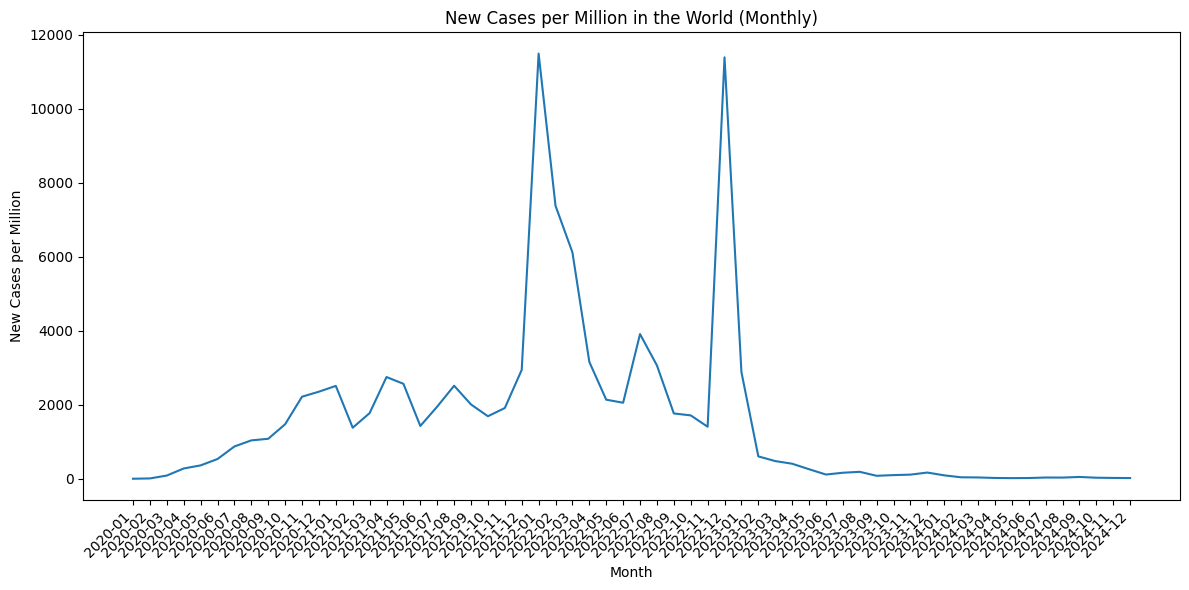

In [118]:
world_cases = cases_deaths[cases_deaths['country'] == 'World'].copy().reset_index(drop=True)

# Create a month-based index for the x-axis
world_cases['month'] = world_cases['date'].dt.to_period('M')
world_cases = world_cases.groupby('month').agg({'new_cases_per_million': 'sum'}).reset_index()

# Plot the line plot
plt.figure(figsize=(12, 6))
plt.plot(world_cases['month'].astype(str), world_cases['new_cases_per_million'])
plt.xlabel('Month')
plt.ylabel('New Cases per Million')
plt.title('New Cases per Million in the World (Monthly)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

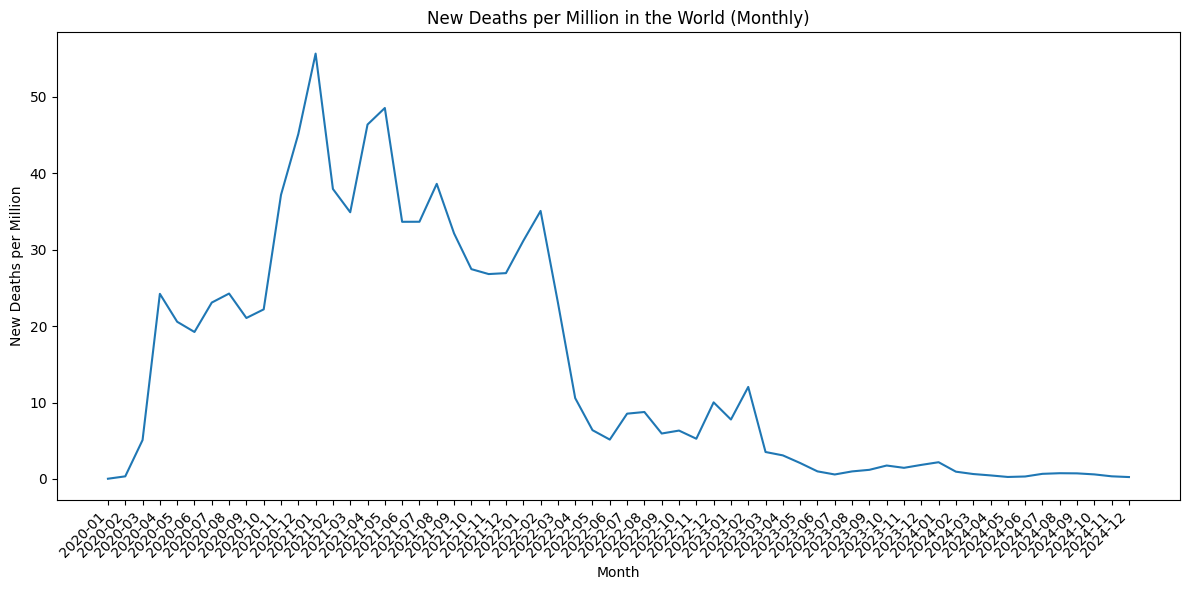

In [119]:
world_deaths = cases_deaths[cases_deaths['country'] == 'World'].copy().reset_index(drop=True)

# Create a month-based index for the x-axis
world_deaths['month'] = world_deaths['date'].dt.to_period('M')
world_deaths = world_deaths.groupby('month').agg({'new_deaths_per_million': 'sum'}).reset_index()

# Plot the line plot
plt.figure(figsize=(12, 6))
plt.plot(world_deaths['month'].astype(str), world_deaths['new_deaths_per_million'])
plt.xlabel('Month')
plt.ylabel('New Deaths per Million')
plt.title('New Deaths per Million in the World (Monthly)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-120-f773b7387348>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_deaths_continents['month'] = cases_deaths_continents['date'].dt.to_period('M')


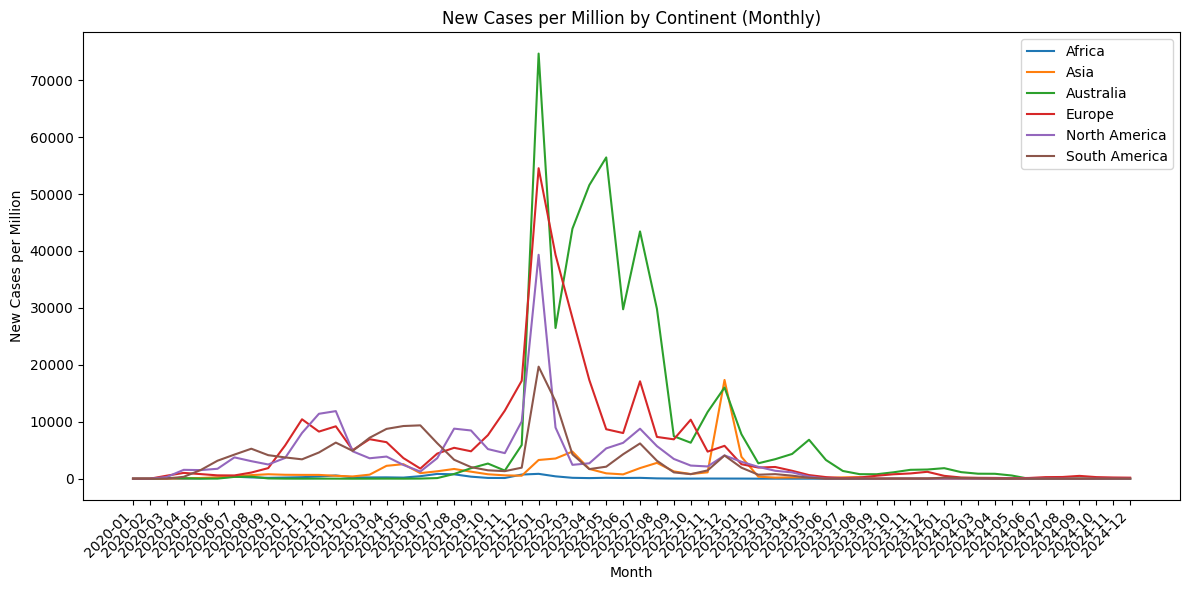

In [120]:
continents = ["Australia", "Africa", "Europe", "Asia", "North America", "South America"]
cases_deaths_continents = cases_deaths[cases_deaths["country"].isin(continents)]
cases_deaths_continents['month'] = cases_deaths_continents['date'].dt.to_period('M')
cases_deaths_continents = cases_deaths_continents.groupby(["country", 'month']).agg({'new_cases_per_million': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
for continent in cases_deaths_continents['country'].unique():
    continent_data = cases_deaths_continents[cases_deaths_continents['country'] == continent]
    plt.plot(continent_data['month'].astype(str), continent_data['new_cases_per_million'], label=continent)
plt.xlabel('Month')
plt.ylabel('New Cases per Million')
plt.title('New Cases per Million by Continent (Monthly)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-121-96fe89ef87e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_deaths_continents['month'] = cases_deaths_continents['date'].dt.to_period('M')


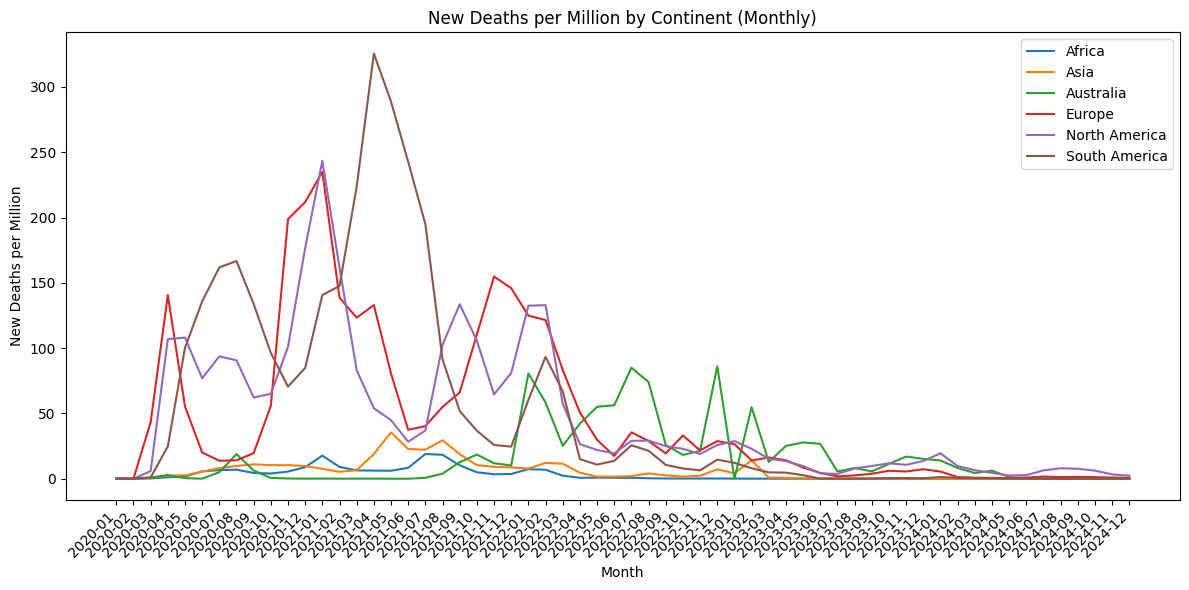

In [121]:
cases_deaths_continents = cases_deaths[cases_deaths["country"].isin(continents)]
cases_deaths_continents['month'] = cases_deaths_continents['date'].dt.to_period('M')
cases_deaths_continents = cases_deaths_continents.groupby(["country", 'month']).agg({'new_deaths_per_million': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
for continent in cases_deaths_continents['country'].unique():
    continent_data = cases_deaths_continents[cases_deaths_continents['country'] == continent]
    plt.plot(continent_data['month'].astype(str), continent_data['new_deaths_per_million'], label=continent)
plt.xlabel('Month')
plt.ylabel('New Deaths per Million')
plt.title('New Deaths per Million by Continent (Monthly)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [122]:
query = """
SELECT *
FROM cases_deaths
"""

for table_name in ['hospital', 'vaccinations_global', 'testing', 'xcgrt_policy']:
  query += f"""
JOIN {table_name}
ON cases_deaths.country = {table_name}.country
AND cases_deaths.date = {table_name}.date
  """
query += """
JOIN misc_data
ON cases_deaths.country = misc_data.location
AND cases_deaths.date = misc_data.date
"""
joined_data = pd.read_sql_query(query, conn)
print(joined_data.head())

     country                 date  new_cases  total_cases  new_deaths  \
0    Algeria  2022-03-07 00:00:00       38.0       265265         2.0   
1  Argentina  2020-12-29 00:00:00    12671.0      1654805       191.0   
2  Argentina  2020-12-30 00:00:00    12545.0      1667350       212.0   
3  Argentina  2021-01-02 00:00:00     7161.0      1684902       148.0   
4  Argentina  2021-01-03 00:00:00     5470.0      1690372       125.0   

   total_deaths  weekly_cases  weekly_deaths  weekly_pct_growth_cases  \
0          6855         410.0           24.0                    -48.8   
1         47946       51707.0          947.0                      6.5   
2         48158       55725.0         1017.0                     11.9   
3         48485       59597.0         1068.0                     36.1   
4         48610       60464.0         1103.0                     34.8   

   weekly_pct_growth_deaths  ...  median_age  gdp_per_capita  extreme_poverty  \
0                     -29.4  ...        2

In [123]:
joined_data

,country,date,new_cases,total_cases,new_deaths,total_deaths,weekly_cases,weekly_deaths,weekly_pct_growth_cases,weekly_pct_growth_deaths,...,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
0,Algeria,2022-03-07 00:00:00,38.0,265265,2.0,6855,410.0,24.0,-48.8,-29.4,...,29.1,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,76.88,0.748
1,Argentina,2020-12-29 00:00:00,12671.0,1654805,191.0,47946,51707.0,947.0,6.5,1.4,...,31.9,18933.907,0.6,191.032,5.50,16.2,27.7,26.664,76.67,0.845
2,Argentina,2020-12-30 00:00:00,12545.0,1667350,212.0,48158,55725.0,1017.0,11.9,7.4,...,31.9,18933.907,0.6,191.032,5.50,16.2,27.7,26.664,76.67,0.845
3,Argentina,2021-01-02 00:00:00,7161.0,1684902,148.0,48485,59597.0,1068.0,36.1,28.5,...,31.9,18933.907,0.6,191.032,5.50,16.2,27.7,26.664,76.67,0.845
4,Argentina,2021-01-03 00:00:00,5470.0,1690372,125.0,48610,60464.0,1103.0,34.8,28.4,...,31.9,18933.907,0.6,191.032,5.50,16.2,27.7,26.664,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18442,United States,2022-06-14 00:00:00,38721.0,84664970,91.0,1002944,726686.0,2305.0,4.6,12.5,...,38.3,54225.446,1.2,151.089,10.79,19.1,24.6,21.222,78.86,0.926
18443,United States,2022-06-15 00:00:00,91358.0,84756328,286.0,1003230,718380.0,2294.0,-2.8,1.2,...,38.3,54225.446,1.2,151.089,10.79,19.1,24.6,21.222,78.86,0.926
18444,United States,2022-06-16 00:00:00,138010.0,84894338,419.0,1003649,704083.0,2237.0,-4.3,-5.9,...,38.3,54225.446,1.2,151.089,10.79,19.1,24.6,21.222,78.86,0.926
18445,United States,2022-06-17 00:00:00,143175.0,85037513,569.0,1004218,702699.0,2164.0,-4.9,-11.5,...,38.3,54225.446,1.2,151.089,10.79,19.1,24.6,21.222,78.86,0.926


In [124]:
joined_data["new_cases"].corr(joined_data["extreme_poverty"])

-0.037321344685484724

In [125]:
joined_data.dtypes[joined_data.dtypes == "object"]

,0
country,object
date,object
total_deaths_last12m,object
total_deaths_per_100k_last12m,object
total_deaths_per_million_last12m,object
country,object
country_code,object
date,object
country,object
date,object


In [126]:
corr_cases = {}
for col in joined_data.columns:
  if col != "country" and col != "date" and col != "location" and col != "iso_code" and col != "country_code":
    corr_cases[col] = joined_data["new_cases_per_million"].corr(joined_data[col])

In [127]:
corr_deaths = {}
for col in joined_data.columns:
  if col != "country" and col != "date" and col != "location" and col != "iso_code" and col != "country_code":
    corr_deaths[col] = joined_data["new_deaths_per_million"].corr(joined_data[col])

In [128]:
corr_cases_df = pd.DataFrame(corr_cases.items(), columns=['Column', 'Correlation'])
corr_deaths_df = pd.DataFrame(corr_deaths.items(), columns=['Column', 'Correlation'])

In [129]:
corr_cases_df.sort_values(by="Correlation", ascending=False).head(25)

,Column,Correlation
12,new_cases_per_million,1.000000
24,new_cases_per_million_7_day_avg_right,0.505486
16,weekly_cases_per_million,0.505486
0,new_cases,0.497305
18,biweekly_cases_per_million,0.489137
21,new_deaths_per_100k,0.342238
13,new_deaths_per_million,0.342238
46,weekly_admissions_hosp_per_1m,0.260283
38,year,0.229027
61,rolling_vaccinations_12m_per_hundred,0.201758


In [130]:
corr_cases_df.sort_values(by="Correlation", ascending=True).head(25)

,Column,Correlation
28,cfr_100_cases,-0.165334
27,cfr,-0.165334
29,cfr_short_term,-0.119422
49,daily_people_vaccinated_smoothed_per_hundred,-0.113702
75,c8ev_international_travel_controls,-0.105907
73,c6m_stay_at_home_requirements,-0.092945
69,c2m_workplace_closing,-0.078404
92,stringency_index_vax,-0.077605
68,c1m_school_closing,-0.076337
93,stringency_index_weighted_average,-0.066148


In [131]:
corr_deaths_df.sort_values(by="Correlation", ascending=False).head(25)

,Column,Correlation
21,new_deaths_per_100k,1.000000
13,new_deaths_per_million,1.000000
17,weekly_deaths_per_million,0.491049
26,new_deaths_per_100k_7_day_avg_right,0.491047
25,new_deaths_per_million_7_day_avg_right,0.491047
19,biweekly_deaths_per_million,0.466832
2,new_deaths,0.398156
42,daily_occupancy_hosp_per_1m,0.351834
12,new_cases_per_million,0.342238
44,weekly_admissions_icu_per_1m,0.311986


In [132]:
corr_deaths_df.sort_values(by="Correlation", ascending=True).head(25)

,Column,Correlation
57,rolling_vaccinations_6m_per_hundred,-0.143593
98,gdp_per_capita,-0.114394
59,rolling_vaccinations_9m_per_hundred,-0.104958
86,h7_vaccination_policy,-0.096701
61,rolling_vaccinations_12m_per_hundred,-0.095634
105,life_expectancy,-0.092706
106,human_development_index,-0.091366
34,days_since_100_total_cases_and_5m_pop,-0.086012
33,days_since_0_1_total_deaths_per_million,-0.076492
31,days_since_5_total_deaths,-0.075298


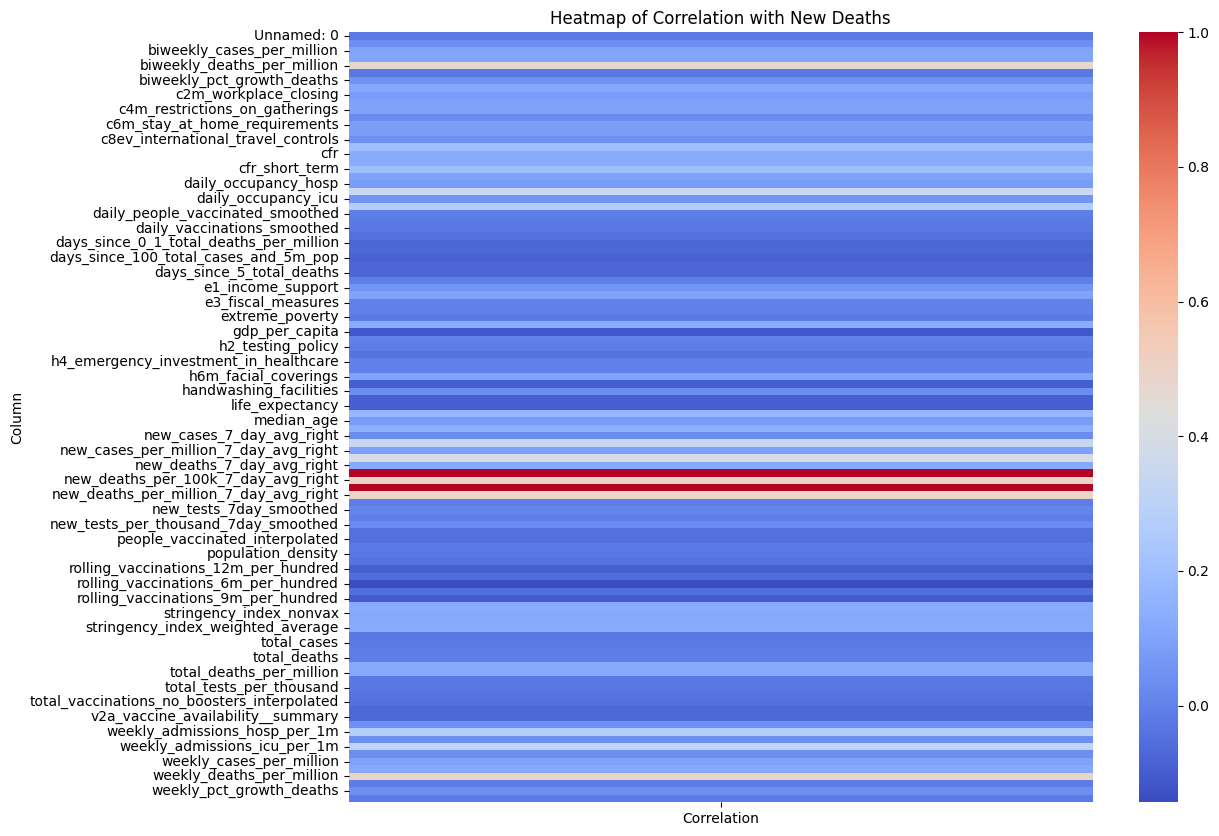

In [133]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_deaths_df.sort_values(by="Correlation", ascending=False).pivot_table(index='Column',values='Correlation'), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation with New Deaths')
plt.show()

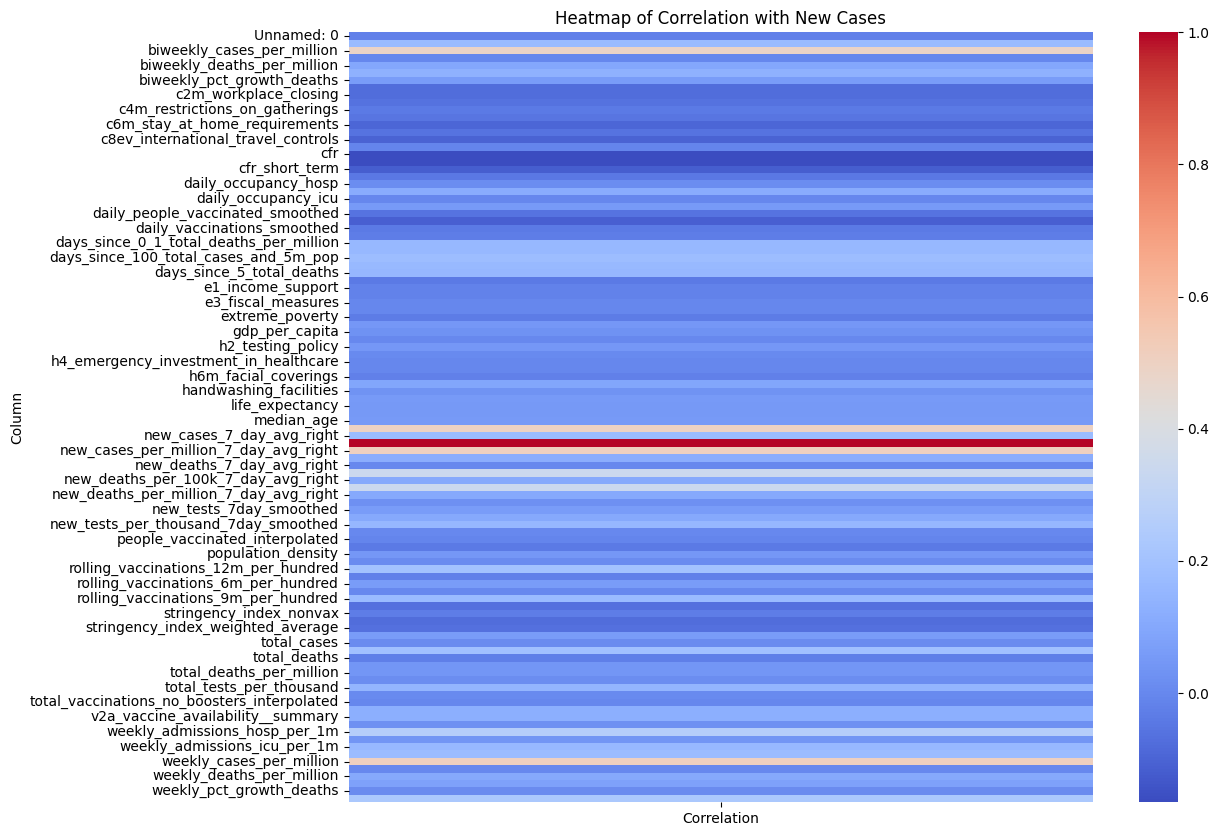

In [134]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_cases_df.sort_values(by="Correlation", ascending=False).pivot_table(index='Column',values='Correlation'), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation with New Cases')
plt.show()

In [186]:
response = pd.read_sql_query("""
SELECT *
FROM cases_deaths
JOIN misc_data
ON cases_deaths.country = misc_data.location
AND cases_deaths.date = misc_data.date
JOIN xcgrt_policy
ON cases_deaths.country = xcgrt_policy.country
AND cases_deaths.date = xcgrt_policy.date
""", conn)

In [187]:
response = response.fillna(0)

<ipython-input-187-d682266e866b>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  response = response.fillna(0)


In [188]:
response

,country,date,new_cases,total_cases,new_deaths,total_deaths,weekly_cases,weekly_deaths,weekly_pct_growth_cases,weekly_pct_growth_deaths,...,h5_investment_in_vaccines,h6m_facial_coverings,h7_vaccination_policy,v2a_vaccine_availability__summary,stringency_index,containment_health_index,v2_vaccine_availability__summary,stringency_index_nonvax,stringency_index_vax,stringency_index_weighted_average
0,Afghanistan,2020-01-05 00:00:00,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.00,0.00,0,0.00,0.00,0.00
1,Afghanistan,2020-01-06 00:00:00,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.00,0.00,0,0.00,0.00,0.00
2,Afghanistan,2020-01-07 00:00:00,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.00,0.00,0,0.00,0.00,0.00
3,Afghanistan,2020-01-08 00:00:00,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.00,0.00,0,0.00,0.00,0.00
4,Afghanistan,2020-01-09 00:00:00,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.00,0.00,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199824,Zimbabwe,2022-12-27 00:00:00,22.0,259969,0.0,5635,161.0,2.0,-35.3,-75.0,...,0.0,3,5,3,29.48,41.65,3,30.56,26.85,29.48
199825,Zimbabwe,2022-12-28 00:00:00,13.0,259982,0.0,5635,146.0,2.0,-47.3,-75.0,...,0.0,3,5,3,29.48,41.65,3,30.56,26.85,29.48
199826,Zimbabwe,2022-12-29 00:00:00,33.0,260015,0.0,5635,145.0,1.0,-53.4,-88.9,...,0.0,3,5,3,29.48,41.65,3,30.56,26.85,29.48
199827,Zimbabwe,2022-12-30 00:00:00,44.0,260059,1.0,5636,163.0,1.0,-51.6,-90.0,...,0.0,3,5,3,29.48,41.65,3,30.56,26.85,29.48


In [138]:
cases_deaths.groupby("country").agg({"new_cases_per_million": "sum"}).sort_values(by="new_cases_per_million", ascending=False).head(20)

,new_cases_per_million
country,
Brunei,769240.228911
Cyprus,755365.938731
San Marino,741418.227655
Austria,671067.447617
South Korea,667636.047952
Martinique,659169.406600
Slovenia,643532.381821
Jersey,641502.323829
Faroe Islands,641351.616425


In [139]:
cases_deaths.groupby("country").agg({"new_cases": "sum"}).sort_values(by="new_cases", ascending=False).head(20)

,new_cases
country,
World,777194124.0
World excl. China,677812545.0
World excl. China and South Korea,643240672.0
"World excl. China, South Korea, Japan and Singapore",606430393.0
High-income countries,429662644.0
Asia,301608389.0
Europe,254062030.0
Upper-middle-income countries,252382734.0
Asia excl. China,202226810.0


In [145]:
oxcgrt_policy.groupby("country").agg({"stringency_index": "mean"}).sort_values(by="stringency_index", ascending=False).head(20)

,stringency_index
country,
China,73.313212
Myanmar,63.734462
Honduras,62.847701
Eritrea,61.988330
Azerbaijan,59.991551
Iran,59.336734
Philippines,58.481861
Iraq,58.380474
Hong Kong,58.076049


In [192]:
response[["stringency_index", "year", "country"]].iloc[:, [0, 1, 2]].groupby(["year", "country"]).mean().reset_index()

,year,country,stringency_index
0,2020,Afghanistan,41.945691
1,2020,Albania,55.806022
2,2020,Algeria,60.889751
3,2020,Andorra,38.639282
4,2020,Angola,58.971409
...,...,...,...
541,2022,Venezuela,19.829589
542,2022,Vietnam,37.224575
543,2022,Yemen,13.559068
544,2022,Zambia,15.472685


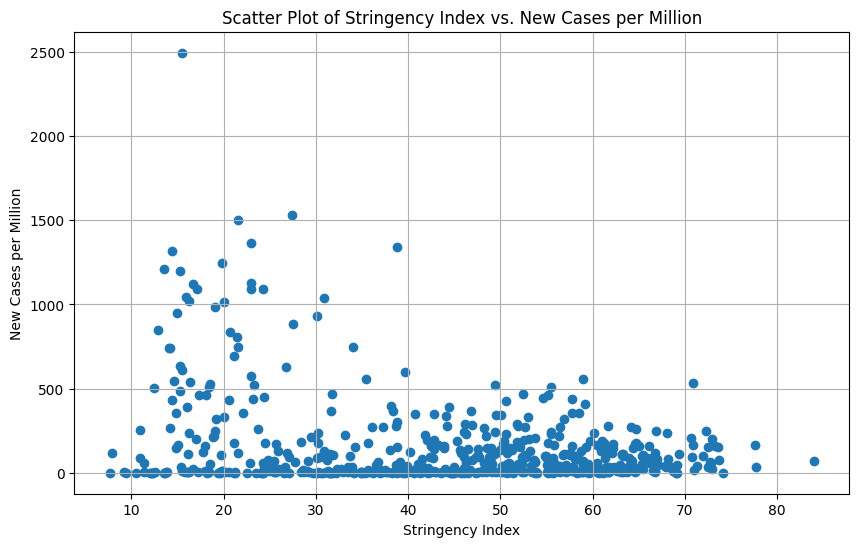

In [195]:
plt.figure(figsize=(10, 6))
plt.scatter(response[["stringency_index", "year", "country"]].iloc[:, [0, 1, 2]].groupby(["year", "country"]).mean().reset_index()["stringency_index"], response[["new_cases_per_million", "year", "country"]].iloc[:, [0, 1, 2]].groupby(["year", "country"]).mean().reset_index()["new_cases_per_million"])
plt.xlabel('Stringency Index')
plt.ylabel('New Cases per Million')
plt.title('Scatter Plot of Stringency Index vs. New Cases per Million')
plt.grid(True)
plt.show()


In [197]:
vaccine_case = pd.read_sql_query("""
SELECT *
FROM cases_deaths
JOIN vaccinations_global
ON cases_deaths.country = vaccinations_global.country
AND cases_deaths.date = vaccinations_global.date
""", conn)
vaccine_case = vaccine_case.fillna(0)

In [199]:
vaccine_case

,country,date,new_cases,total_cases,new_deaths,total_deaths,weekly_cases,weekly_deaths,weekly_pct_growth_cases,weekly_pct_growth_deaths,...,people_vaccinated_interpolated,people_fully_vaccinated_interpolated,total_boosters_interpolated,total_vaccinations_no_boosters_interpolated,rolling_vaccinations_6m,rolling_vaccinations_6m_per_hundred,rolling_vaccinations_9m,rolling_vaccinations_9m_per_hundred,rolling_vaccinations_12m,rolling_vaccinations_12m_per_hundred
0,Afghanistan,2021-02-22 00:00:00,13.0,55617,1.0,2433,103.0,6.0,-33.5,-57.1,...,0.000000e+00,5.562400e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
1,Afghanistan,2021-02-23 00:00:00,29.0,55646,2.0,2435,128.0,7.0,-4.5,-50.0,...,1.366667e+03,5.562400e+04,0.000000e+00,1.366667e+03,1366.666667,0.003368,1.366667e+03,0.003368,1.366667e+03,0.003368
2,Afghanistan,2021-02-24 00:00:00,18.0,55664,1.0,2436,124.0,8.0,-10.1,-20.0,...,2.733333e+03,5.562400e+04,0.000000e+00,2.733333e+03,2733.333333,0.006736,2.733333e+03,0.006736,2.733333e+03,0.006736
3,Afghanistan,2021-02-25 00:00:00,16.0,55680,2.0,2438,123.0,8.0,-10.2,-27.3,...,4.100000e+03,5.562400e+04,0.000000e+00,4.100000e+03,4100.000000,0.010104,4.100000e+03,0.010104,4.100000e+03,0.010104
4,Afghanistan,2021-02-26 00:00:00,16.0,55696,4.0,2442,121.0,12.0,-6.9,100.0,...,5.466667e+03,5.562400e+04,0.000000e+00,5.466667e+03,5466.666667,0.013472,5.466667e+03,0.013472,5.466667e+03,0.013472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200087,Zimbabwe,2023-12-27 00:00:00,0.0,266071,0.0,5731,23.0,0.0,0.0,-100.0,...,7.516167e+06,5.653986e+06,2.288662e+06,1.163116e+07,699467.665179,4.352884,1.047290e+06,6.517434,1.395113e+06,8.681983
200088,Zimbabwe,2023-12-28 00:00:00,0.0,266071,0.0,5731,23.0,0.0,0.0,-100.0,...,7.518596e+06,5.656020e+06,2.291488e+06,1.163216e+07,699467.665179,4.352884,1.047290e+06,6.517434,1.395113e+06,8.681983
200089,Zimbabwe,2023-12-29 00:00:00,0.0,266071,0.0,5731,23.0,0.0,0.0,-100.0,...,7.521025e+06,5.658053e+06,2.294315e+06,1.163315e+07,699467.665179,4.352884,1.047290e+06,6.517434,1.395113e+06,8.681983
200090,Zimbabwe,2023-12-30 00:00:00,0.0,266071,0.0,5731,23.0,0.0,0.0,-100.0,...,7.523453e+06,5.660086e+06,2.297141e+06,1.163415e+07,699467.665179,4.352884,1.047290e+06,6.517434,1.395113e+06,8.681983


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(vaccine_case[["stringency_index", "year", "country"]].iloc[:, [0, 1, 2]].groupby(["year", "country"]).mean().reset_index()["stringency_index"], response[["new_cases_per_million", "year", "country"]].iloc[:, [0, 1, 2]].groupby(["year", "country"]).mean().reset_index()["new_cases_per_million"])
plt.xlabel('Stringency Index')
plt.ylabel('New Cases per Million')
plt.title('Scatter Plot of Stringency Index vs. New Cases per Million')
plt.grid(True)
plt.show()

In [ ]:
response

In [ ]:
response.groupby("country").agg({"stringency_index": "mean"}).sort_values(by="stringency_index", ascending=False).head(20)